In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import json
import pickle

import numpy as np

sys.path.insert(0, "/home/anonymous/Desktop/eeg_sampling/modeling")
from readbytes import _read8, _read32
from datafilters import apply_dc_filter

In [22]:
fs = 250
sample_time = 1.5
num_channels = 8
max_rows = int(250*sample_time - 10)

masterfolder = "predicting"
dt_f32 = np.dtype("<f4")

path = "./.."
visualizepath = path + '/visualizing'

In [8]:
with open(visualizepath+"/sample/"+"visualize_000000", "rb") as readstream:
    magic = _read32(readstream)
    rows = _read32(readstream)
    cols = _read32(readstream)
    buf = readstream.read(max_rows * cols * dt_f32.itemsize)
    data = np.frombuffer(buf, dtype=dt_f32)
    data.shape = (max_rows, cols)

In [9]:
#DC Filter
enable_dc = True
dc_lowcut = 1.0
dc_highcut = 13.0
dc_order = 2
dc_type = "bandpass"
dc_func_type = "butter"

In [10]:
data.flags['WRITEABLE'] = True
for i in range(0, data.shape[1]):
    data[:,i] = apply_dc_filter(data[:,i], fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)

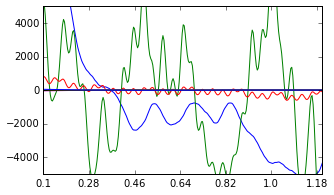

In [53]:
interval_num = 6

xminsec = 0.1
xmaxsec = 1.2
xintervalsec = np.around([(xmaxsec - xminsec)/interval_num], decimals=2)[0]

xmin = xminsec*fs
xmax = xmaxsec*fs
xinterval = int((xmax-xmin)/interval_num)

#extent = [0, total_sample_time, freq_min, freq_max]

plt.figure(figsize=(5,3))
plt.ylim([-5000,5000])
plt.xlim([int(xmin),int(xmax)])
plt.xticks(np.arange(xmin, xmax, xinterval), np.arange(xminsec, xmaxsec, xintervalsec))
plt.plot(data)

In [ ]:
plt.savefig('./../../public/eegimages/test.png')

In [36]:

#np.linspace()

array([ 0.    ,  0.1875,  0.375 ,  0.5625,  0.75  ,  0.9375,  1.125 ,
        1.3125])

2.92